In [1]:
import sys
sys.path.append("/home/ljq/code/Kludge_EMRI")
from src.emrikludge.parameters import EMRIParameters, WaveformConfig
from src.emrikludge.core.aak_cpu import generate_aak_waveform_cpu

from src.emrikludge.parameters import EMRIParameters, WaveformConfig
from src.emrikludge.core.aak_cpu import generate_aak_waveform_cpu
from src.emrikludge.core.nk_cpu import generate_nk_waveform_cpu

In [ ]:
params = EMRIParameters(M=1.0e6, mu=10.0, a=0.7,
                        p0=10.0, e0=0.3, iota0=0.3)
config = WaveformConfig(dt=10.0, T=2*365.25*86400.0)

t, hI, hII, hp, hx = generate_aak_waveform_cpu(params, config)
print(f"Generated waveform with {len(t)} samples.")

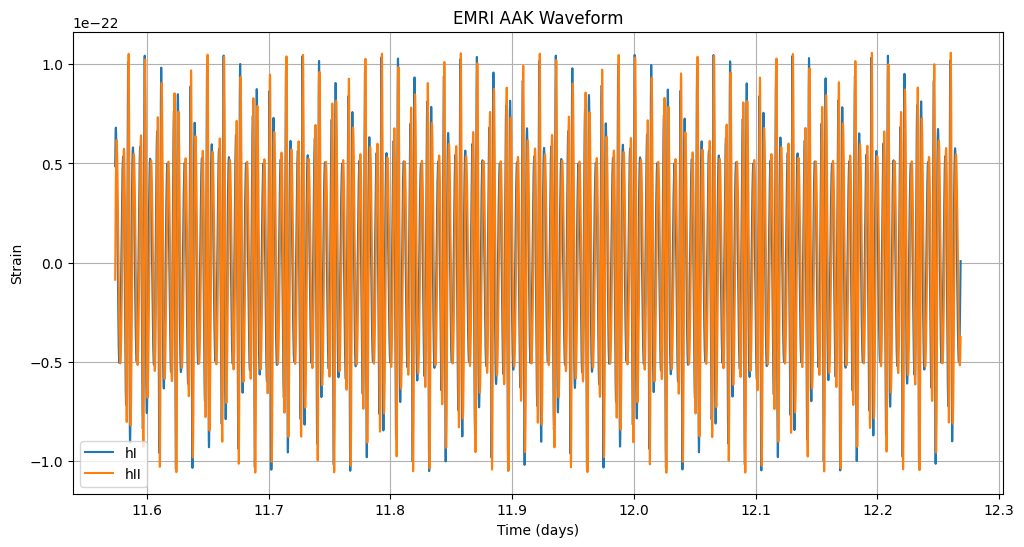

In [4]:
#绘制波形图
from matplotlib import pyplot as plt
start=100000
length=6000
plt.figure(figsize=(12, 6))
plt.plot(t[start:start+length] / 86400.0, hI[start:start+length], label='hI')
plt.plot(t[start:start+length] / 86400.0, hII[start:start+length], label='hII')
plt.xlabel('Time (days)')
plt.ylabel('Strain')
plt.title('EMRI AAK Waveform')
plt.legend()
plt.grid()
plt.show()

NK waveform length: 6311520


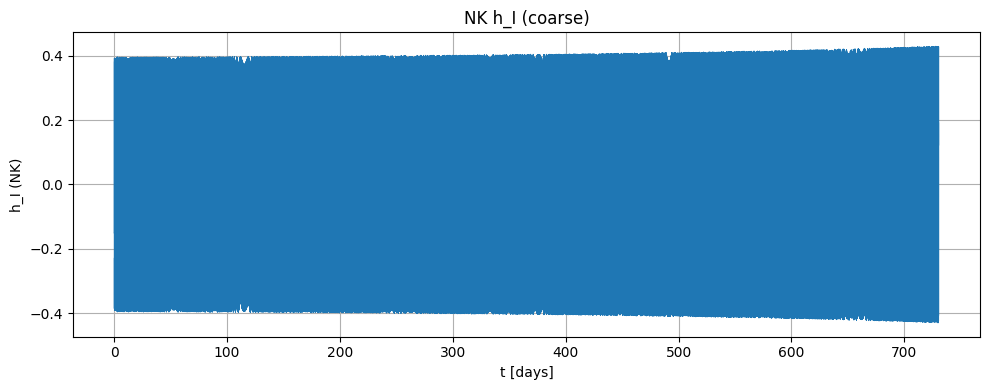

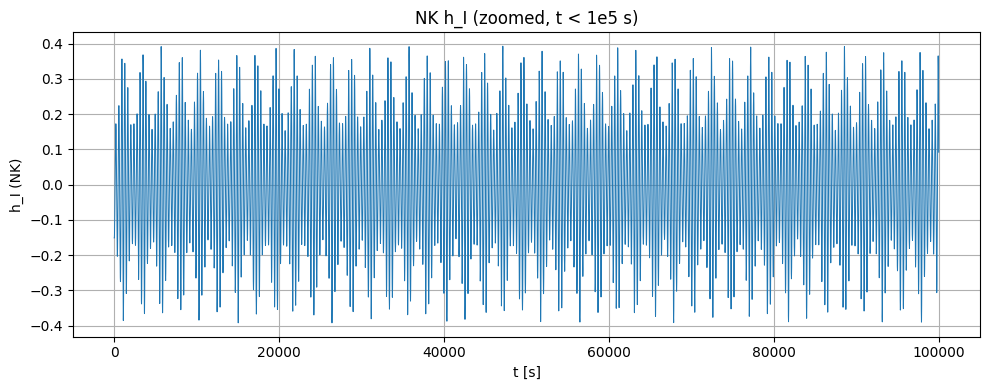

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/home/ljq/code/Kludge_EMRI")

from src.emrikludge.parameters import EMRIParameters, WaveformConfig
from src.emrikludge.core.aak_cpu import generate_aak_waveform_cpu
from src.emrikludge.core.nk_cpu import generate_nk_waveform_cpu

params = EMRIParameters(
    M=1.0e6,
    mu=10.0,
    a=0.7,
    p0=10.0,
    e0=0.2,
    iota0=0.3,
)

config = WaveformConfig(
    dt=10.0,
    T=2 * 365.25 * 86400.0,
    include_lisa_response=True,
    n_max=10,
)

# # AAK
# t_aak, hI_aak, hII_aak, hp_aak, hx_aak = generate_aak_waveform_cpu(params, config)
# print("AAK waveform length:", len(t_aak))

# plt.figure(figsize=(10,4))
# plt.plot(t_aak/86400.0, hI_aak, lw=0.5)
# plt.xlabel("t [days]")
# plt.ylabel("h_I (AAK)")
# plt.grid(True)
# plt.title("AAK h_I (coarse)")
# plt.tight_layout()
# plt.show()

# mask_zoom = t_aak < 1.0e5
# plt.figure(figsize=(10,4))
# plt.plot(t_aak[mask_zoom], hI_aak[mask_zoom], lw=0.7)
# plt.xlabel("t [s]")
# plt.ylabel("h_I (AAK)")
# plt.grid(True)
# plt.title("AAK h_I (zoomed, t < 1e5 s)")
# plt.tight_layout()
# plt.show()

# NK
t_nk, hI_nk, hII_nk, hp_nk, hx_nk = generate_nk_waveform_cpu(params, config)
print("NK waveform length:", len(t_nk))

plt.figure(figsize=(10,4))
plt.plot(t_nk/86400.0, hI_nk, lw=0.5)
plt.xlabel("t [days]")
plt.ylabel("h_I (NK)")
plt.grid(True)
plt.title("NK h_I (coarse)")
plt.tight_layout()
plt.show()

mask_zoom_nk = t_nk < 1.0e5
plt.figure(figsize=(10,4))
plt.plot(t_nk[mask_zoom_nk], hI_nk[mask_zoom_nk], lw=0.7)
plt.xlabel("t [s]")
plt.ylabel("h_I (NK)")
plt.grid(True)
plt.title("NK h_I (zoomed, t < 1e5 s)")
plt.tight_layout()
plt.show()
